In [343]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from keras import models
from keras import layers
from keras.datasets import mnist
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from keras.utils import to_categorical

In [344]:
#Importamos y mostramos el csv
data = pd.read_csv('historial_clinico.csv',sep=',')
# Mostramos los nombres de las columnas del dataset
print(data.keys())

Index(['edad', 'creatinina_fosfocinasa', 'diabetes', 'sangre_contraccion',
       'plaquetas', 'creatinina', 'sodio', 'seguimiento', 'fallecimiento',
       'anemia', 'tension', 'sexo', 'fumador'],
      dtype='object')


In [345]:
# Mostramos diferente informacion del dataset para ver los tipos de los datos, el numero de nulos y los posibles valores de algunas columnas
data.info()

columnas = ['diabetes','anemia', 'tension', 'sexo', 'fumador']

print("\nCOLUMNAS--------------------")
for columna in columnas:
    print(columna,':',pd.unique(data[columna]))

# Para finalizar mostramos el dataset
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   edad                    299 non-null    int64  
 1   creatinina_fosfocinasa  299 non-null    int64  
 2   diabetes                299 non-null    object 
 3   sangre_contraccion      299 non-null    int64  
 4   plaquetas               299 non-null    float64
 5   creatinina              299 non-null    float64
 6   sodio                   299 non-null    int64  
 7   seguimiento             299 non-null    int64  
 8   fallecimiento           299 non-null    int64  
 9   anemia                  298 non-null    object 
 10  tension                 299 non-null    object 
 11  sexo                    299 non-null    object 
 12  fumador                 299 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 30.5+ KB

COLUMNAS--------------------
diabete

,edad,creatinina_fosfocinasa,diabetes,sangre_contraccion,plaquetas,creatinina,sodio,seguimiento,fallecimiento,anemia,tension,sexo,fumador
0,75,582,No,20,265000.00,1.9,130,4,1,No,muy alta,Hombre,ocasional
1,55,7861,No,38,263358.03,1.1,136,6,1,No,ligeramente alta,Hombre,ocasional
2,65,146,No,20,162000.00,1.3,129,7,1,No,ligeramente alta,Hombre,>2 paquetes/día
3,50,111,No,20,210000.00,1.9,137,7,1,Si,ligeramente alta,Hombre,ocasional
4,65,160,Sí,20,327000.00,2.7,116,8,1,Si,ligeramente alta,Mujer,ocasional
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,61,Sí,38,155000.00,1.1,143,270,0,0,alta,masculino,sí
295,55,1820,No,38,270000.00,1.2,139,271,0,0,normal,femenino,no
296,45,2060,Sí,60,742000.00,0.8,138,278,0,0,normal,femenino,no
297,45,2413,No,38,140000.00,1.4,140,280,0,0,normal,masculino,sí


Despues de analizar los datos comprobamos que no hay datos nulos pero tenemos que cambiar algunos tipos de variables y codificar varias columnas.

In [346]:
# Creamos diferentes funciones para organizar las columnas que tienen diferentes nombres para un tipo de valor. De esta forma quedan bien clasificados
def diabetesBool(value):
    if value == 'Sí':
        return True
    else:
        return False

def anemiaBool(value):
    if value in ['Si','Sí','1']:
        return True
    elif value == np.nan:
        data = data.dropna(subset=['anemia'])
    else:
        return False
    
def sexoBool(value):
    if value in ['Hombre', 'Man', 'masculino',]:
        return 0
    else:
        return 1


# A cada dato de cada columna que queramos tratar le aplicamos las funciones que hemos definindo con .apply
data['diabetes'] = data['diabetes'].apply(diabetesBool)
data['anemia'] = data['anemia'].apply(anemiaBool)
data['sexo'] = data['sexo'].apply(sexoBool)

In [347]:
# Instanciamos un label encoder para pasar a numerico las diferentes categorias que vienen como strings.
le = LabelEncoder()

data['tension_coded'] = le.fit_transform(data['tension'])
data['fumador_coded'] = le.fit_transform(data['fumador'])

data

,edad,creatinina_fosfocinasa,diabetes,sangre_contraccion,plaquetas,creatinina,sodio,seguimiento,fallecimiento,anemia,tension,sexo,fumador,tension_coded,fumador_coded
0,75,582,False,20,265000.00,1.9,130,4,1,False,muy alta,0,ocasional,2,2
1,55,7861,False,38,263358.03,1.1,136,6,1,False,ligeramente alta,0,ocasional,1,2
2,65,146,False,20,162000.00,1.3,129,7,1,False,ligeramente alta,0,>2 paquetes/día,1,0
3,50,111,False,20,210000.00,1.9,137,7,1,True,ligeramente alta,0,ocasional,1,2
4,65,160,True,20,327000.00,2.7,116,8,1,True,ligeramente alta,1,ocasional,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,61,True,38,155000.00,1.1,143,270,0,False,alta,0,sí,0,3
295,55,1820,False,38,270000.00,1.2,139,271,0,False,normal,1,no,3,1
296,45,2060,True,60,742000.00,0.8,138,278,0,False,normal,1,no,3,1
297,45,2413,False,38,140000.00,1.4,140,280,0,False,normal,0,sí,3,3


In [348]:
# El proximo paso seria eliminar los outliers
# Creamos un array para almacenar los indices de los datos que contenga al menos un outlier en alguno de sus atributos
outliers = []

for columna in ['edad','creatinina_fosfocinasa','sangre_contraccion','plaquetas','creatinina','sodio','seguimiento','tension_coded','fumador_coded','sexo','fallecimiento']:
  # Calculamos los cuartiles de la lista de medias
  Q1 = np.quantile(data[columna],0.25)
  Q3 = np.quantile(data[columna],0.75)

  # Rango Intercuartílico
  IQR = Q3 - Q1

  # La k es el valor que afecta a la sensibilidar a la deteccion de outliers.
  # Una k menor implica que el codigo sera mas sensible a los outliers,
  # y una k mayor hara que sea menos sensible.
  # En este caso optare por una menor sensibilidad para entrenar el modelo con posibles valores un poco anomalos
  k = 3

  # Limites inferior y superior del rango intercuartílico
  xL = Q1 - k * IQR
  xU = Q3 + k * IQR

  for j in range(len(data)):
    if data[columna][j] < xL or data[columna][j] > xU:
      print('Eliminado outlier:',columna,'=', data[columna][j])

      if j not in outliers:
        outliers.append(j)

data = data.drop(outliers)
data.reset_index(drop=True, inplace=True)

data.describe()
data.info()

Eliminado outlier: creatinina_fosfocinasa = 7861
Eliminado outlier: creatinina_fosfocinasa = 2656
Eliminado outlier: creatinina_fosfocinasa = 3964
Eliminado outlier: creatinina_fosfocinasa = 7702
Eliminado outlier: creatinina_fosfocinasa = 5882
Eliminado outlier: creatinina_fosfocinasa = 5209
Eliminado outlier: creatinina_fosfocinasa = 4540
Eliminado outlier: creatinina_fosfocinasa = 2261
Eliminado outlier: creatinina_fosfocinasa = 2334
Eliminado outlier: creatinina_fosfocinasa = 2442
Eliminado outlier: creatinina_fosfocinasa = 3966
Eliminado outlier: creatinina_fosfocinasa = 2281
Eliminado outlier: creatinina_fosfocinasa = 2794
Eliminado outlier: creatinina_fosfocinasa = 2017
Eliminado outlier: creatinina_fosfocinasa = 2522
Eliminado outlier: creatinina_fosfocinasa = 2695
Eliminado outlier: creatinina_fosfocinasa = 2060
Eliminado outlier: creatinina_fosfocinasa = 2413
Eliminado outlier: plaquetas = 621000.0
Eliminado outlier: plaquetas = 850000.0
Eliminado outlier: plaquetas = 742000.

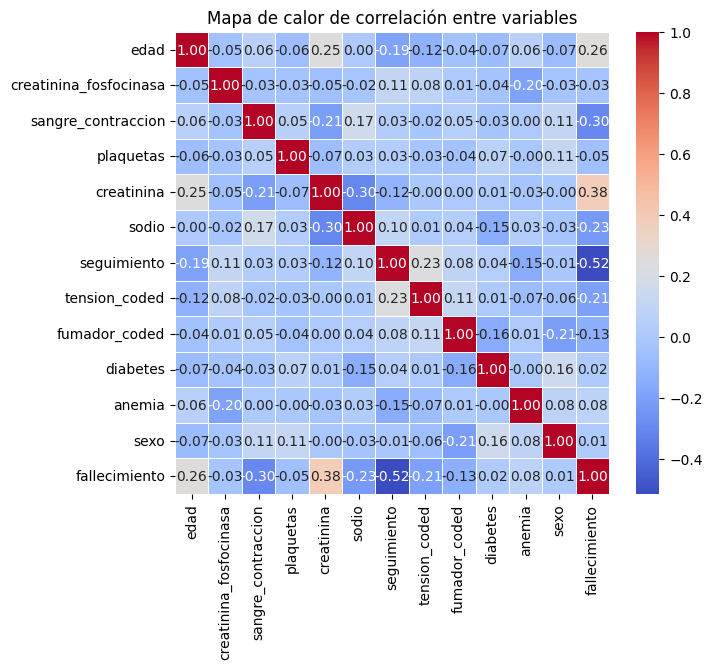

In [349]:
# Una vez preparados y limpios los datos, vamos a comprobar si existe correlacion y eliminar las columnas que toque
# Correlacion de variables
correlacion = data[['edad','creatinina_fosfocinasa','sangre_contraccion','plaquetas','creatinina','sodio','seguimiento','tension_coded','fumador_coded','diabetes','anemia','sexo','fallecimiento']].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de calor de correlación entre variables')
plt.show()
# En este caso no exisste correlacion entre las columnas

In [350]:
# Instanciamos un objeto de la calse MinMaxScaler para escalar todos los valores entre 0 y 1 y que la red neuronal pueda trabajar con ellos
scaler = MinMaxScaler()

X = data[['edad','creatinina_fosfocinasa','sangre_contraccion','plaquetas','creatinina','sodio','seguimiento','tension_coded','fumador_coded','diabetes','anemia','sexo']]


X = pd.DataFrame(scaler.fit_transform(X))
# Por otro lado pasamos el target a one hot
y = to_categorical(data[['fallecimiento']])

# Comprobamos que no hya problemas con los shapes
print(X.shape)
print(y.shape)

(262, 12)
(262, 2)


In [351]:
# Hacemos un trainTest para las variables
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5,stratify=y)

In [352]:
# Instanciamos un red neuronal secuencial vacia
model = Sequential()

model.add(Input(shape=(12,)))

model.add(Dense(20, activation='softplus', kernel_initializer='he_uniform')) # kernel_inicializer es una forma de inicializar los kernels para que no tengan valores aleatorios
model.add(Dense(20, activation='relu', kernel_initializer='he_uniform')) # kernel_inicializer es una forma de inicializar los kernels para que no tengan valores aleatorios

# Tiene 2 neuronas de salida porque hay 2 categorias a las que pueden pertenecer los datos
model.add(Dense(2, activation='softmax'))

In [353]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='binary_accuracy'
    )

In [354]:
#Fase de entrenamiento
h = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=600,
    batch_size=8,
    shuffle=True,
    use_multiprocessing=True
    )

Epoch 1/600
17/17 [==============================] - 1s 13ms/step - loss: 0.6578 - binary_accuracy: 0.7023 - val_loss: 0.6182 - val_binary_accuracy: 0.7023
Epoch 2/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6084 - binary_accuracy: 0.7023 - val_loss: 0.5962 - val_binary_accuracy: 0.7023
Epoch 3/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5922 - binary_accuracy: 0.7023 - val_loss: 0.5874 - val_binary_accuracy: 0.7023
Epoch 4/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5838 - binary_accuracy: 0.7023 - val_loss: 0.5810 - val_binary_accuracy: 0.7023
Epoch 5/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5790 - binary_accuracy: 0.7023 - val_loss: 0.5764 - val_binary_accuracy: 0.7023
Epoch 6/600
17/17 [==============================] - 0s 4ms/step - loss: 0.5730 - binary_accuracy: 0.7023 - val_loss: 0.5689 - val_binary_accuracy: 0.7023
Epoch 7/600
17/17 [==============================] - 0s 4ms/step - lo

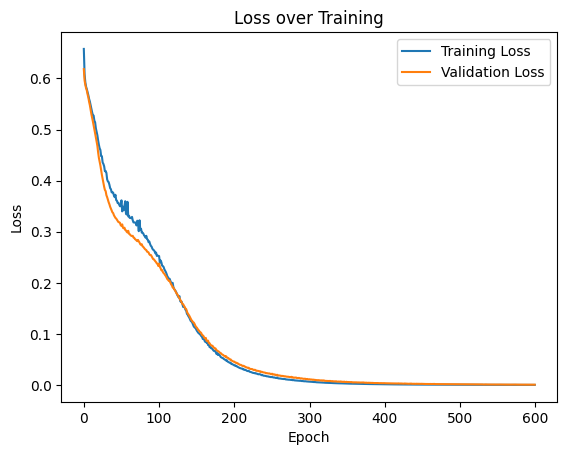

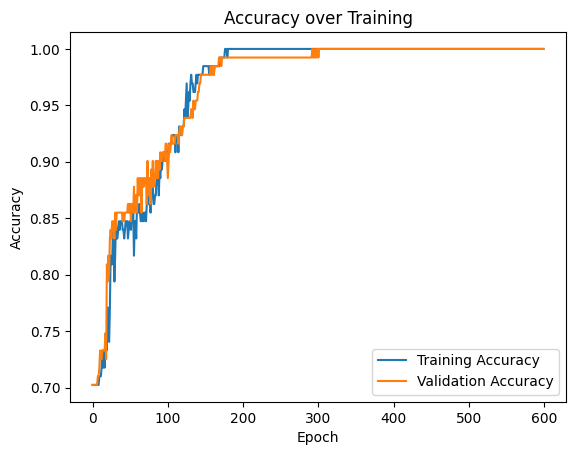

In [355]:
# Graficar la pérdida durante el entrenamiento
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.title('Loss over Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar la precisión (accuracy) durante el entrenamiento
plt.plot(h.history['binary_accuracy'], label='Training Accuracy')
plt.plot(h.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()